In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
iso_model = IsolationForest(random_state=16)

iso_model.fit(train_df)

IsolationForest(random_state=16)

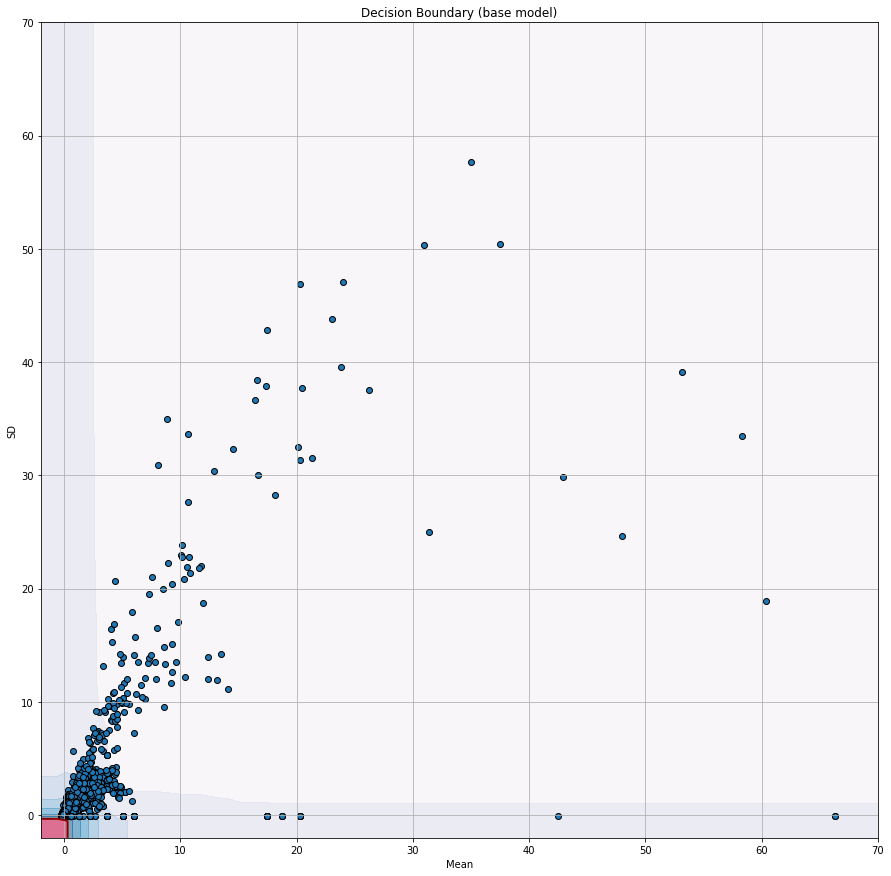

In [58]:
import matplotlib.pyplot as plt

def plotDecisionBoundary(iso_model, samples, title):
    # Change the plot's size.
    plt.rcParams['figure.figsize'] = [15, 15]

    # Plot of the decision frontier
    xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
    Z = iso_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.title(title)
    # This draw the "soft" or secondary boundaries.
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
    # This draw the line that separates the hard from the soft boundaries.
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    # This draw the hard boundary
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
    plt.scatter(samples.iloc[:, 0],
                samples.iloc[:, 1],
                edgecolors='k')
    plt.xlabel('Mean')
    plt.ylabel('SD')
    plt.grid(True)
    plt.show()
    
plotDecisionBoundary(iso_model, train_df, "Decision Boundary (base model)")

In [20]:
iso_model2 = IsolationForest(contamination=0.001, random_state=16)

iso_model2.fit(train_df)

IsolationForest(contamination=0.001, random_state=16)

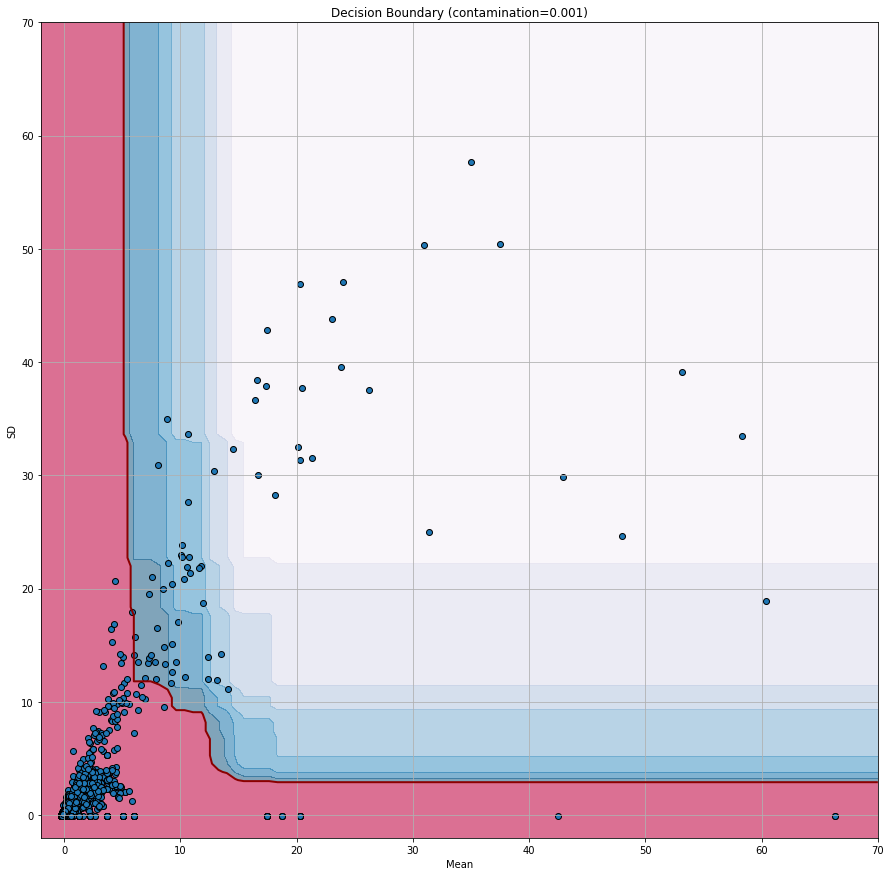

In [59]:
plotDecisionBoundary(iso_model2, train_df, "Decision Boundary (contamination=0.001)")

In [55]:
def plotDecisionBoundary2(iso_model, samples, title):
    # Change the plot's size.
    plt.rcParams['figure.figsize'] = [15, 15]

    # Plot of the decision frontier
    xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
    Z = iso_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.title(title)
    # This draw the "soft" or secondary boundaries.
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
    # This draw the line that separates the hard from the soft boundaries.
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    # This draw the hard boundary
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
    inliers = samples.loc[samples['prediction']==1]
    outliers = samples.loc[samples['prediction']==-1]
    
    plt.scatter(inliers.iloc[:, 0],
                inliers.iloc[:, 1],
                edgecolors='k', c='b')
    
    plt.scatter(outliers.iloc[:, 0],
                outliers.iloc[:, 1],
                edgecolors='k', c='r')
    
    plt.xlabel('Mean')
    plt.ylabel('SD')
    plt.grid(True)
    plt.show()

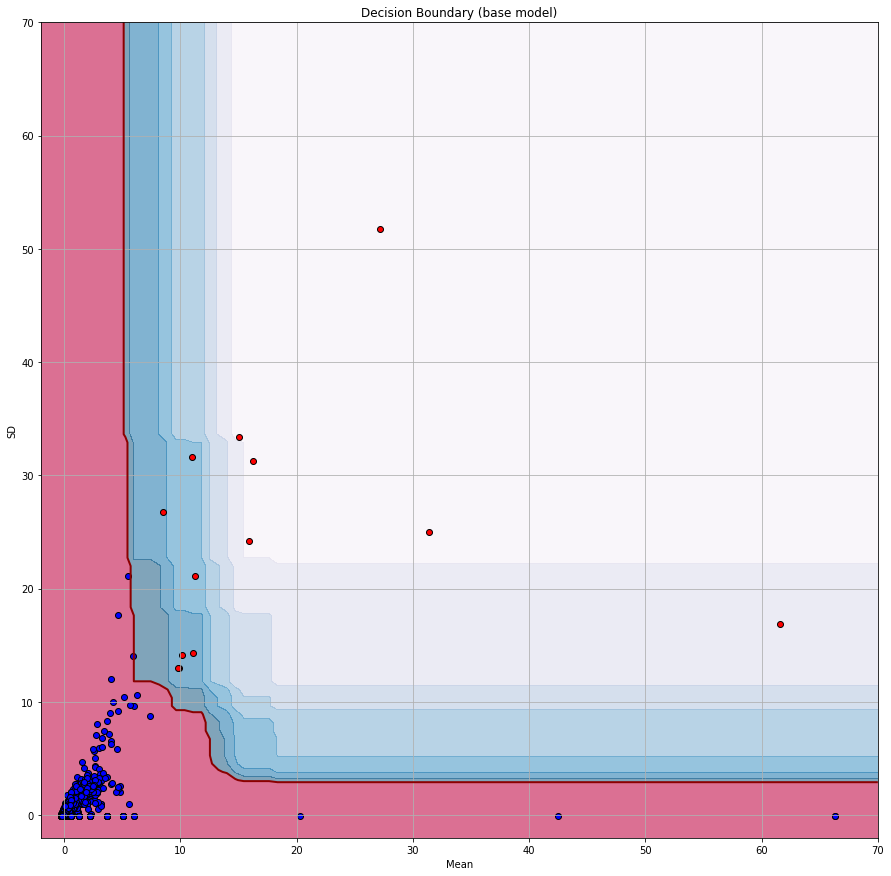

In [56]:
predictions = iso_model2.predict(test_df)
preds = pd.concat([test_df, pd.Series(predictions, name='prediction')], axis=1)

plotDecisionBoundary2(iso_model2, preds, "Decision Boundary (test samples, contamination=0.001)")

In [57]:
from joblib import dump, load

dump(iso_model2, 'model.joblib')

['model.joblib']

In [64]:
x = np.array([1, 2])


In [66]:
x.reshape(-1, 2)

array([[1, 2]])